In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# set line width to 1
plt.rcParams['lines.linewidth'] = 1
%config InlineBackend.figure_formats = ['svg']
# auto reload imports
%load_ext autoreload 
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gdp = pd.read_csv('data/GDP.csv', index_col=0, parse_dates=True)
gdp['growth'] = ((gdp['GDP'].pct_change()+1)**4-1)*100
# 5 year median GDP growth
gdp['5y_median'] = gdp['growth'].rolling(4*5).median()
gdp['year'] = gdp.index.year
gdp['quarter'] = gdp.index.quarter

In [3]:
us20y = pd.read_csv('data/DGS20.csv', index_col=0, parse_dates=True)
# convert DGS20 to float type, NaN on error
us20y.DGS20 = pd.to_numeric(us20y.DGS20, errors='coerce')
# drop all rows with NaN
us20y = us20y.dropna()
# compute year and quarter
us20y['year'] = us20y.index.year
us20y['quarter'] = us20y.index.quarter

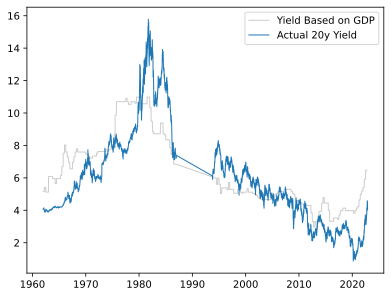

In [4]:
# left join us20y and gdp on year and quarter
df = pd.merge(us20y.reset_index(), gdp, on=['year', 'quarter'], how='left')
plt.plot(df.DATE, df['5y_median'], color='#ccc', label='Yield Based on GDP')
plt.plot(df.DATE, df.DGS20, label='Actual 20y Yield')
plt.legend()